QuantumHelpers is a library intended to help with learning and understanding quantum computing, or can be used for quick calculations.

In [1]:
import sys

# Hard coding my path, this should be changed to use a module.
sys.path.append( "C:\\Users\\timmy\\code\\QuantumHelpers\\src" )

import QuantumHelpers as qh
import numpy as np

In [2]:
# Use the eval function to read in a wavefunction as a string

# This bell state is being created by addin the |00> and |11>
# and normalizing by a factor of 1/sqrt(2)
bell_state = qh.eval("(1/Sr(2))(|00> + |11>)")
print(bell_state)

[[1/√2]
 [0]
 [0]
 [1/√2]]


In [3]:
# The same bell state can be created by starting with the |00> state,
# applying a Hadamard to the first qubit, and then a Cnot across the two qubtis

# Gates are applied right to left, as if they are a function call
# The HI is a kronecker product of a Hadamard gate and Identity.
# This creates a 2-qubit gate where the
# Hadamard is applied to the first qubit, and Identity to the second.
same_bell_state = qh.eval("Cnot * HI|00>")
print(same_bell_state)

[[1/√2]
 [0]
 [0]
 [1/√2]]


In [4]:
# This same state can be made again by applying
# a Hadamard to a single |0> state, then kronecker
# multiplying to another single qubit |0> state
# and then applying the Cnot across both qubits.
# Make sure to use parenthesis to define order of operations
same_bell_state_again = qh.eval("Cnot * (H|0>)|0>")
print(same_bell_state_again)

[[1/√2]
 [0]
 [0]
 [1/√2]]


In [5]:
# The eval function will also return an object that can be multiplied together.
zeroKet = qh.eval("|0>")
hadamard = qh.eval("H")
cNot = qh.eval("Cnot")
print(cNot * ((hadamard * zeroKet) * zeroKet))

[[1/√2]
 [0]
 [0]
 [1/√2]]


In [6]:
# When one matrix is applied to another matrix, they can be matrix multiplied,
# or kronecker multiplied. To specify in a eval string,
# an explicit * is matrix multiplication,
# and two matricies next to each other is assumed to be a kronecker product.
print(qh.eval("XZ")) # Make a 2 qubit gate with X1 Z2
print("----------------")
print(qh.eval("X * Z")) # Apply Z and then X to the same qubit

[[0 0 1 0]
 [0 0 0 -1]
 [1 0 0 0]
 [0 -1 0 0]]
----------------
[[0 -1]
 [1 0]]


In [7]:
# Both types of multiplication can also be specified while using objects.
X = qh.eval("X")
Z = qh.eval("Z")
print(X & Z) # & is for kron
print("----------------")
print(X * Z) # * is for matrix multiply

[[0 0 1 0]
 [0 0 0 -1]
 [1 0 0 0]
 [0 -1 0 0]]
----------------
[[0 -1]
 [1 0]]


In [8]:
# Matricies, Bras, and Kets are kept track of and handled
# appropriately when evaluated.
# This allows for projectors and expectation values to be created easily.
print(qh.eval("|0><0|"))
print("--------------")
print( qh.eval("<0||0>"))
 # The vertical bar must be included for the ket and bra... just because of how it is tokenized

[[1 0]
 [0 0]]
--------------
1


In [9]:
# This can also be done with objects, and can take advantage of the dagger method
# Dagger is a hermetian conjugate (transpose and complex conjugate), which makes a ket a bra
zeroKet = qh.eval("|0>")
print(zeroKet * zeroKet.dagger())
print("--------------")
print(zeroKet.dagger() * zeroKet)

[[1 0]
 [0 0]]
--------------
1


In [10]:
# The eval function uses a class called WaveFunctionElement, which simply stores data and type.
# It is easy to get the data of the object as a numpy array by accessing the data attribute.

# This can be helpful, because all of numpy functions are still available to use on WaveFunctionElement,
# just pass the data of the object into the numpy function!
example_data = qh.eval("H|0>")
print(example_data)
print("-------------")
print(example_data.data)

[[1/√2]
 [1/√2]]
-------------
[0.70710678 0.70710678]


In [11]:
# Rotation gates and matrix exponentiation is also supported by the eval function.
print(qh.eval("-1jRz(Pi)*Ry(3π/2)") )
# Pi can be used as the unicode symbol or by using "Pi"

[[1/√2 1/√2]
 [1/√2 -1/√2]]


In [12]:
# Exponentiated gates can be built with the Exp function inside the string
print(qh.eval("Rx(Pi/2)|0>"))
print("-------------")
print(qh.eval("Exp(-1j * (Pi/4) * X)|0>"))
print("-------------")
# Or can built by calling exponentiate matrix
h = qh.eval("-1j * (Pi/4) * X")
# Custom wavefunction elements can be created by calling the contructor. It needs data and a type
exponentiated_h = qh.WaveFunctionElement(qh.exponentiate_matrix(h.data), qh.WaveFunctionTokens.OPERATOR)
print(exponentiated_h * qh.eval("|0>"))

[[1/√2]
 [0-1/√2j]]
-------------
[[1/√2]
 [0-1/√2j]]
-------------
[[1/√2]
 [0-1/√2j]]


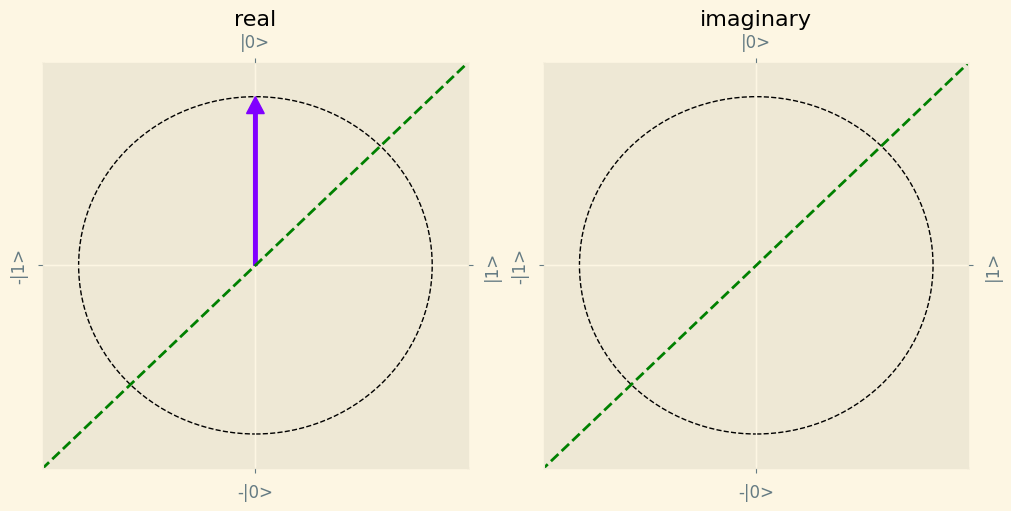

In [13]:
# ket objects can also be drawn
# This is a simple 1 qubit example with a |0>
zeroKet = qh.eval("|0>")
zeroKet.draw()

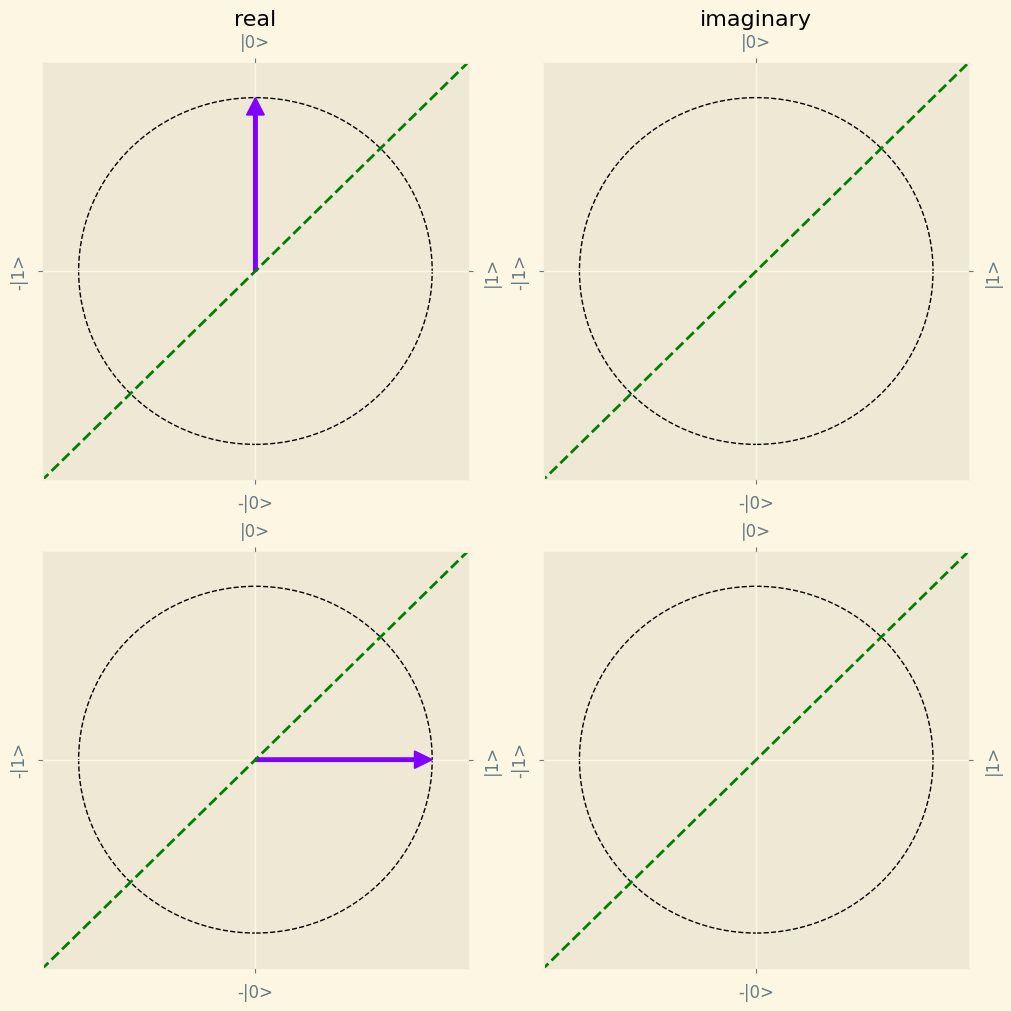

In [18]:
# Multiple qubits can also be drawn and will get their own graph
a = qh.eval("|01>")
a.draw()

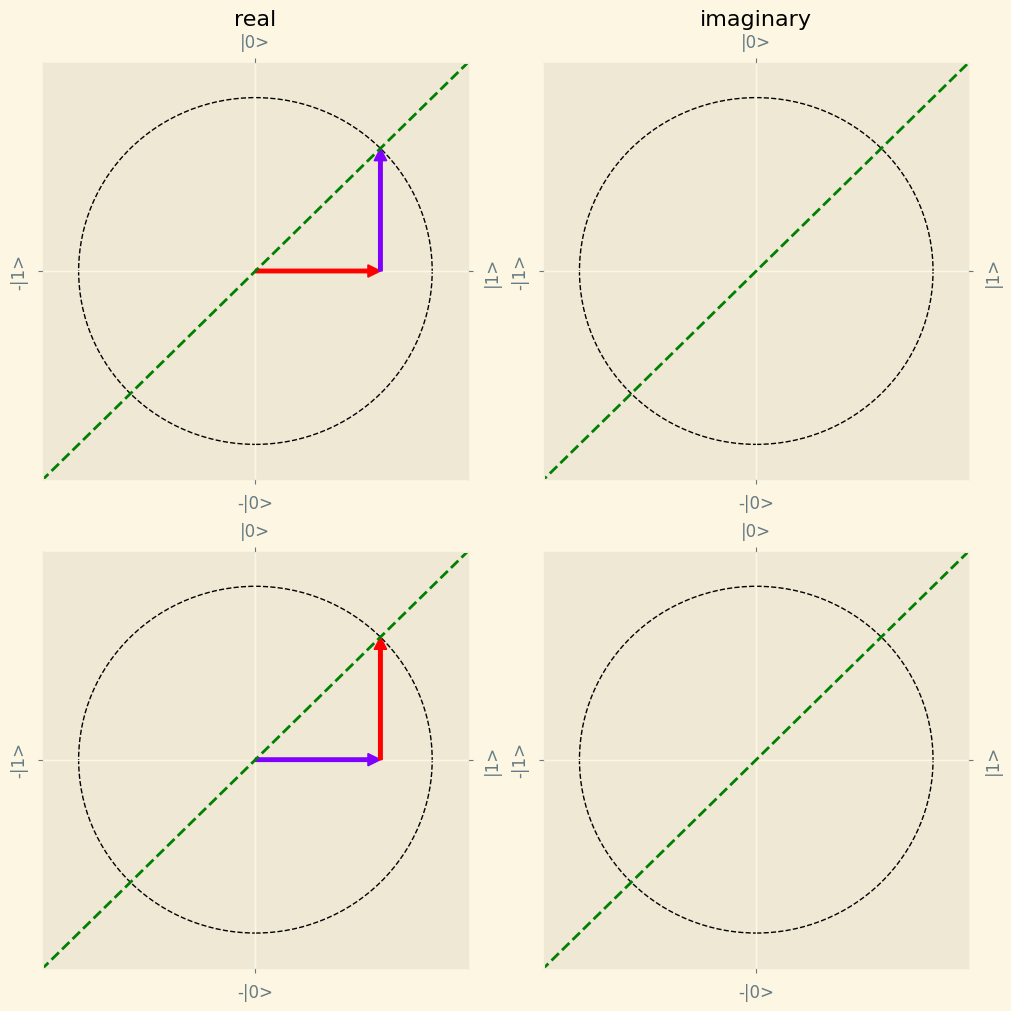

In [19]:
# Entanglement can kinda sorta be shown with colors. 
# In this state, the first qubit is one when the second is zero and vice versa.
# Notice how the color for the |0> part on the first qubit (purple) matches the color for the |1> part on the second qubit
# And how the color for the |1> part on the first qubit (red) matches the color for the |0> part on the second qubit
# And finally, the end of the two vectors together lies on the X-axis, which is where the toal state of the qubit is.
zeroKet = qh.eval("(1/Sr(2)) * (|01> + |10>)")
zeroKet.draw()

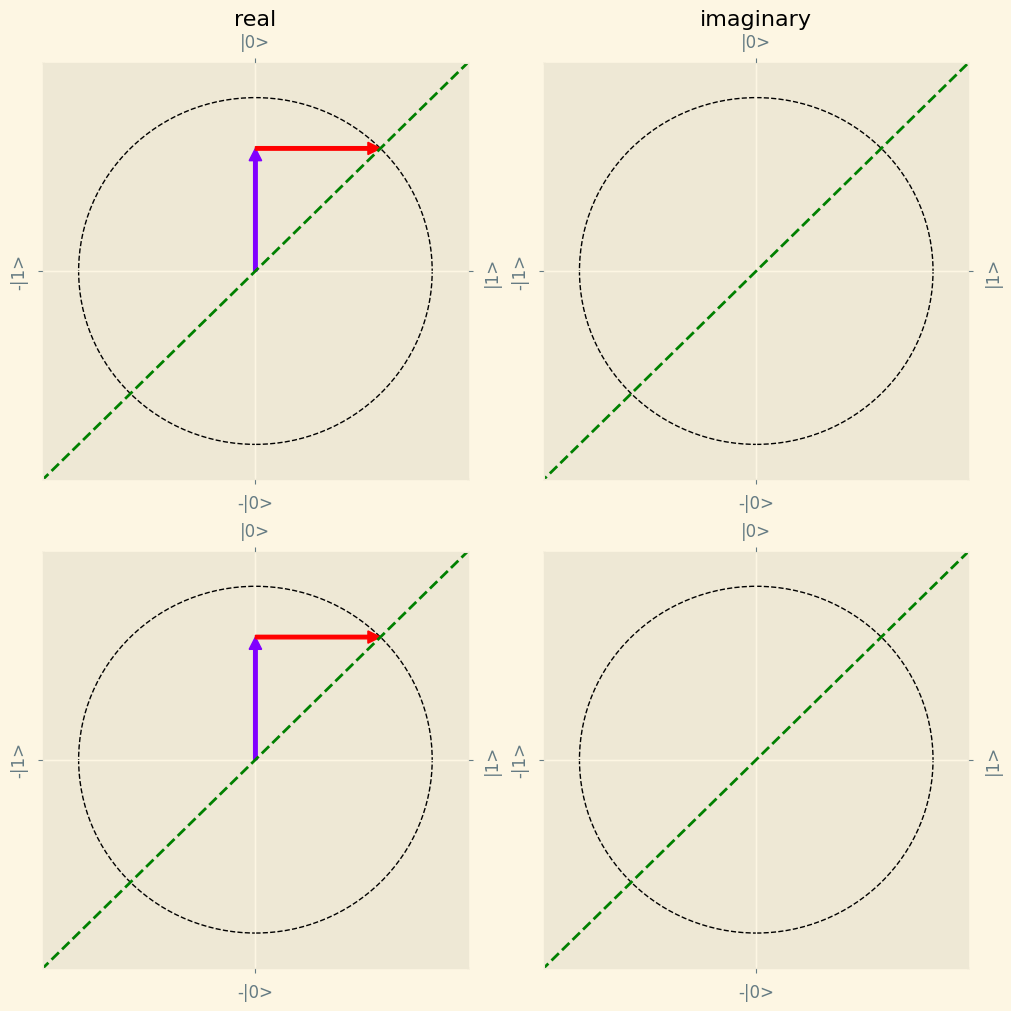

In [15]:
# Entanglement can kinda sorta be shown with colors. 
# In this state, the first qubit is one when the second is zero and vice versa.
zeroKet = qh.eval("(1/Sr(2)) * (|11> + |00>)")
zeroKet.draw()

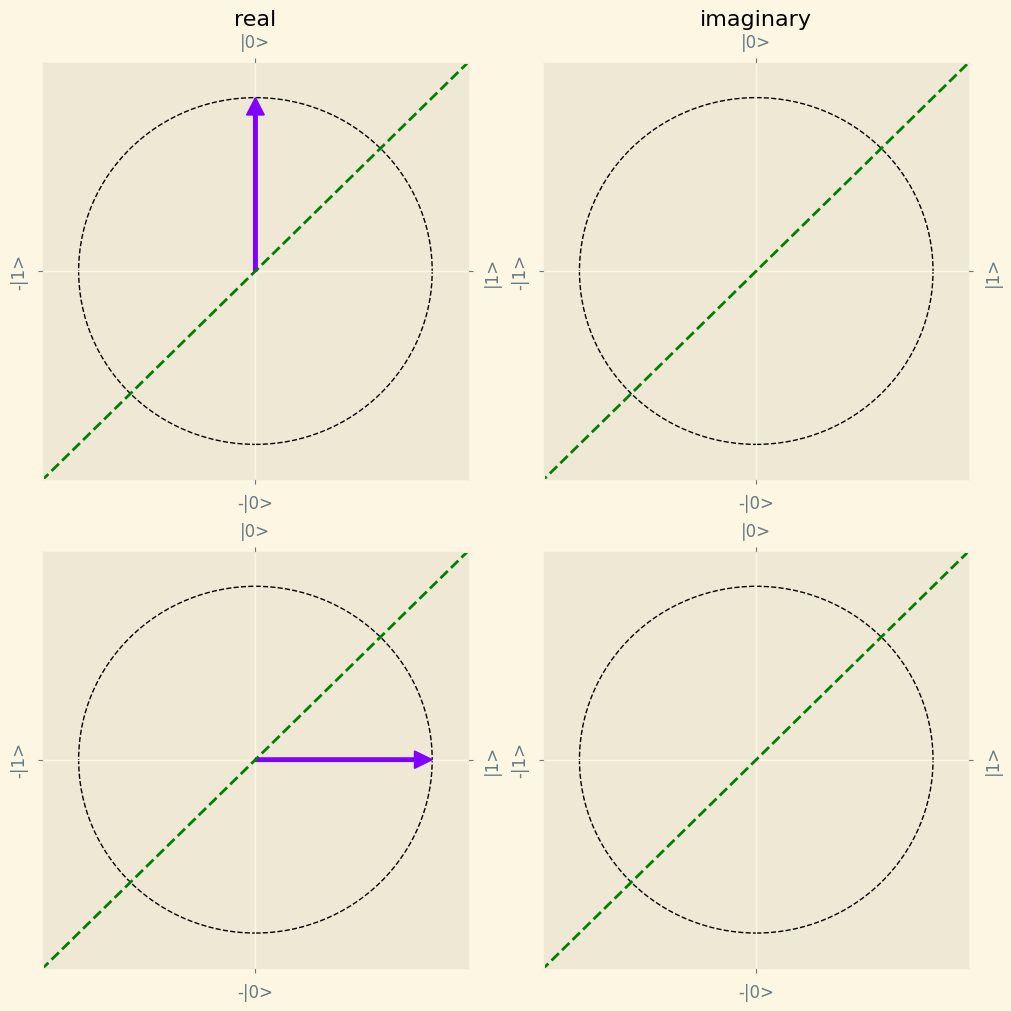

In [16]:
# Here is a more complicated example of finding the ground state energy of the Heisenberg model with 8 qubits.

full_hp = qh.WaveFunctionElement(np.zeros((2**8, 2**8)), qh.WaveFunctionTokens.OPERATOR)
xs = ['XXIIIIII', 'IXXIIIII', 'IIXXIIII', 'IIIXXIII', 'IIIIXXII', 'IIIIIXXI', 'IIIIIIXX']
ys = ['YYIIIIII', 'IYYIIIII', 'IIYYIIII', 'IIIYYIII', 'IIIIYYII', 'IIIIIYYI', 'IIIIIIYY']
zs = ['ZZIIIIII', 'IZZIIIII', 'IIZZIIII', 'IIIZZIII', 'IIIIZZII', 'IIIIIZZI', 'IIIIIIZZ']
for i in range(7):
    full_hp += qh.eval(xs[i]) + qh.eval(ys[i]) + qh.eval(zs[i])

eigs, eigVecs = np.linalg.eig(full_hp.data)
print(np.min(eigs))

gs_psi = qh.WaveFunctionElement(np.transpose(eigVecs)[np.argmin(eigs)], qh.WaveFunctionTokens.OPERATOR)



(-13.499730394751628+1.972152264454809e-31j)
